In [1]:

#Importing libraries

import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras import datasets, layers, models
import sklearn
from sklearn.metrics import accuracy_score
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense
from tensorflow.keras.layers import MaxPooling2D, Activation, Flatten, Dropout
from keras import optimizers
from tensorflow.keras import optimizers
from keras.models import Sequential
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
## initial parameters
lr = 1e-2
batch_size = 50 
epochs = 100
img_dims = (250,250,3) #specifying image dimensions

data = []
labels = []

# loading image files
image_files = [f for f in glob.glob(r'D:/Individual_Trees_photos/segall' + "/**/*",
recursive=True) if not os.path.isdir(f)]

random.shuffle(image_files)


In [3]:
## converting images to arrays 
for img in image_files:

    image = cv2.imread(img)
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    ## labelling the categories
    label = img.split(os.path.sep)[-2] 
    if label == "tree1":
        label = 0
    elif label == "tree2":
          label = 1
        
    elif label == "tree3":
        label = 2
        
    else: 
        label = 3
    labels.append([label])  # [[1], [0], [0], ...]

In [4]:
print (labels)

[[0], [1], [1], [2], [0], [1], [1], [3], [1], [0], [3], [3], [0], [2], [1], [1], [0], [2], [2], [1], [1], [0], [0], [0], [3], [1], [0], [3], [0], [0], [3], [1], [2], [2], [0], [2], [3], [2], [2], [3], [3], [0], [0], [3], [3], [2], [1], [1], [1], [0], [1], [0], [3], [0], [1], [2], [3], [3], [2], [3], [0], [3], [3], [3], [3], [2], [3], [3], [2], [1], [2], [1], [2], [1], [3], [3], [1], [0], [2], [1], [1], [0], [3], [0], [1], [1], [2], [1], [1], [3], [3], [2], [2], [1], [1], [2], [3], [2], [3], [2], [3], [3], [1], [2], [2], [3], [2], [3], [0], [3], [3], [3], [0], [2], [1], [0], [1], [2], [0], [1], [2], [3], [3], [0], [0], [1], [3], [3], [3], [2], [2], [3], [3], [2], [0], [3], [2], [0], [1], [3], [3], [1], [3], [3], [3], [3], [3], [0], [1], [3], [2], [1], [1], [0], [1], [3], [2], [0], [2], [0], [1], [3], [3], [2], [0], [1], [2], [3], [1], [0], [1], [0], [3], [2], [1], [2], [3], [0], [1], [0], [0], [2], [3], [1], [2], [0], [2], [0], [0], [3], [0], [1], [3], [0], [0], [3], [2], [3], [1], [3],

In [5]:
## pre-processing
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

## split dataset for training and validation
x_train,x_test,y_train,y_test = train_test_split(data, labels,
test_size=0.2)

## converting into categorical labels
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [6]:
#CNN model

model_cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(250,250,3)),
        layers.MaxPool2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),
        
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),
        
        layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),

        #Dense

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        #layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')             
])

In [7]:
#Compiling model
model_cnn.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [8]:
#Model fitting
history=model_cnn.fit(x_train, y_train, epochs=30, batch_size=50, 
          #validation_split = 0.2,
          verbose=1,)

Epoch 1/30
22/22 [==============================] - 34s 2s/step - loss: 1.3769 - acc: 0.2754
Epoch 2/30
22/22 [==============================] - 37s 2s/step - loss: 1.3037 - acc: 0.3522
Epoch 3/30
22/22 [==============================] - 33s 2s/step - loss: 1.1004 - acc: 0.6011
Epoch 4/30
22/22 [==============================] - 32s 1s/step - loss: 0.8963 - acc: 0.6532
Epoch 5/30
22/22 [==============================] - 33s 2s/step - loss: 0.7577 - acc: 0.7054
Epoch 6/30
22/22 [==============================] - 33s 2s/step - loss: 0.6362 - acc: 0.7585
Epoch 7/30
22/22 [==============================] - 32s 1s/step - loss: 0.5856 - acc: 0.7887
Epoch 8/30
22/22 [==============================] - 33s 1s/step - loss: 0.5317 - acc: 0.8097
Epoch 9/30
22/22 [==============================] - 33s 1s/step - loss: 0.5075 - acc: 0.8088
Epoch 10/30
22/22 [==============================] - 33s 1s/step - loss: 0.4615 - acc: 0.8390
Epoch 11/30
22/22 [==============================] - 32s 1s/step - lo

In [9]:
#Model Evaluation
model_cnn.evaluate(x_test,y_test)

9/9 [==============================] - 2s 234ms/step - loss: 0.3521 - acc: 0.8905


[0.35214924812316895, 0.8905109763145447]

In [10]:
Y_pred = model_cnn.predict([x_test])
y_pred=np.argmax(Y_pred, axis=1)
loss= model_cnn.evaluate( x_test,y_test)
print(loss)
print("Baseline Error: %.2f%%" % (100-loss[1]*100))

9/9 [==============================] - 2s 243ms/step - loss: 0.3521 - acc: 0.8905
[0.35214924812316895, 0.8905109763145447]
Baseline Error: 10.95%


In [11]:
Y_test=np.argmax(y_test, axis=1)

In [12]:
#Accuracy calculation
accuracy_score(Y_test, np.argmax(Y_pred, axis=1))

0.8905109489051095

([<matplotlib.axis.YTick at 0x25b0364b3d0>,
 [Text(0, 0.5, 'Tree1'),
  Text(0, 1.5, 'Tree2'),
  Text(0, 2.5, 'Tree3'),
  Text(0, 3.5, 'Tree4')])

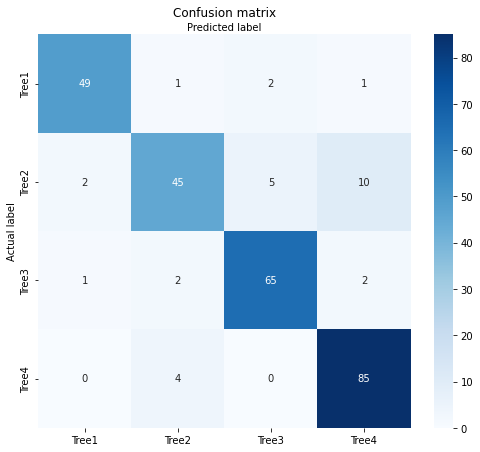

In [13]:
#Confusion matrix

matrix= confusion_matrix(Y_test, y_pred)

class_names=['Tree1', 'Tree2', 'Tree3', 'Tree4'] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.xlabel('Predicted label') 
plt.ylabel('Actual label')
tick_marks = [0.5, 1.5,2.5,3.5]
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names)

In [14]:
#Classification report
print (classification_report(Y_test, np.argmax(Y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        53
           1       0.87      0.73      0.79        62
           2       0.90      0.93      0.92        70
           3       0.87      0.96      0.91        89

    accuracy                           0.89       274
   macro avg       0.89      0.88      0.89       274
weighted avg       0.89      0.89      0.89       274

